# Episode 3: Basic plotting and data visualization

In this episode we pick up where we left off with our cleaned dataset and we learn:

* how to create plots
* some common kinds of plots we'll often use in data visualization
* a few useful arguments to make plots more presentable

Download the dataset used in this example: https://raw.githubusercontent.com/redshiftzero/pandas-minicourse/main/out/space_clean.csv

In [1]:
import pandas as pd
pd.__version__

'1.1.1'

We need to import matplotlib as this will be our plotting "backend" that pandas will use to draw plots:

In [2]:
import matplotlib.pyplot as plt

## Our data

In [3]:
df = pd.read_csv("out/space_clean.csv", index_col=0)

In [4]:
df

,Company Name,Location,Datum,Detail,Status Rocket,Mission cost in Millions USD,Status Mission
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


## Plotting

In pandas, you can call the `.plot()` method which is defined for both series and dataframes in order to create plots. There is a `kind` keyword argument to plot (i.e. `.plot(kind=kind)`) that will let you select what kind of plot you want to create. The plot kinds include:

* `bar` and `barh` to create vertical and horizontal bar charts respectively for visualizing categorical data

* `scatter` to create scatter plots which displays two columns versus one another as individual points in a 2D space

* `hist` to create histograms which show the frequency distribution over a given variable

* `pie` to create pie charts which show categorical data (prefer `bar` and `barh` in most cases, especially when you have many categories or small differences between categories)

* `line` to create line charts which are similar to scatter plots but show points connected with line segments

See this link for a full list of plot kinds available: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html

## Horizontal bar chart: Who are the organizations that have launched the most space missions?

In the last episode we determined the answer to this question using the `.value_counts()` method on the "Company Name" column. This told us for every company how many entries there are with that value.

In [5]:
df["Company Name"].value_counts()

RVSN USSR           1777
Arianespace          279
General Dynamics     251
CASC                 251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
SpaceX               100
MHI                   84
Northrop              83
Lockheed              79
ISRO                  76
Roscosmos             55
ILS                   46
Sea Launch            36
ISAS                  30
Kosmotras             22
US Navy               17
Eurockot              13
Rocket Lab            13
ISA                   13
ESA                   13
Blue Origin           12
IAI                   11
ExPace                10
ASI                    9
AMBA                   8
CNES                   8
JAXA                   7
Land Launch            7
MITT                   7
UT                     5
KCST                   5
CASIC                  5
CECLES                 4
Exos                   4
Arm??e de l'Air        4


In [6]:
type(df["Company Name"].value_counts())

pandas.core.series.Series

Since the type of the `value_counts()` return value is a Series, we can simply call the plot using method chaining, using the kind "barh" to create a horizontal bar chart:

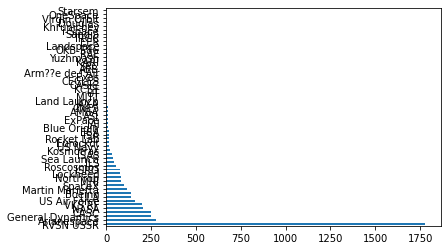

In [7]:
df["Company Name"].value_counts().plot(kind="barh")

This is not readable. For the question we want to answer, it's best if we just show the top 10 or 20 organizations.

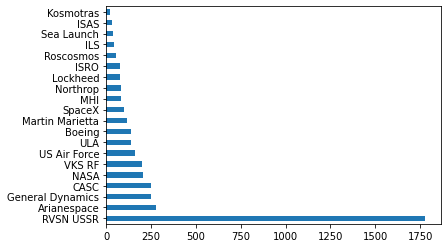

In [8]:
df["Company Name"].value_counts().head(20).plot(kind="barh")

What if we wanted to provide a title for our plot?

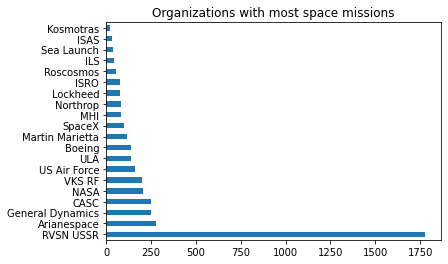

In [9]:
df["Company Name"].value_counts().head(20).plot(kind="barh", title="Organizations with most space missions")

## Histogram: Mission cost in USD

A histogram basically shows the frequency distribution in buckets called bins on the horizontal axis.

Adjusting the number of bins will help us resolve more details in the distribution. There’s a bins keyword argument `bins=20` which we can pass when we’re using the hist plot kind.

In [10]:
type(df['Mission cost in Millions USD'].iloc[0])

str

And we also have commas in our numbers, let's get rid of those:

In [11]:
df['Mission cost in Millions USD'].replace(',', '', regex=True, inplace=True)

In [12]:
df['Mission cost in Millions USD']

0        50.0 
1       29.75 
2          NaN
3        65.0 
4       145.0 
         ...  
4319       NaN
4320       NaN
4321       NaN
4322       NaN
4323       NaN
Name: Mission cost in Millions USD, Length: 4324, dtype: object

In [13]:
df['Mission cost in Millions USD'] = pd.to_numeric(df['Mission cost in Millions USD'])

There's also an `.astype(T)` method you can use instead for casting a pandas object to a specific dtype (here where T=float).

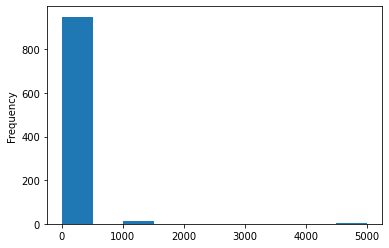

In [14]:
df['Mission cost in Millions USD'].plot(kind='hist')

One can increase the number of bins using the `bins` keyword:

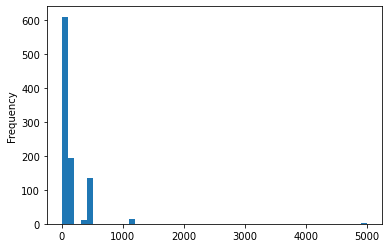

In [15]:
df['Mission cost in Millions USD'].plot(kind='hist', bins=50)

That tells us a little more. But there's a ton of empty space here. Perhaps we want to show just the region between 0 and 500 million USD:

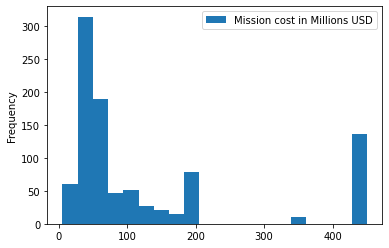

In [16]:
df[df['Mission cost in Millions USD'] < 500].plot(kind='hist', bins=20)

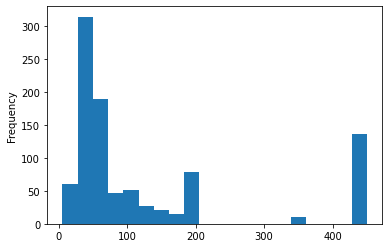

In [17]:
df[df['Mission cost in Millions USD'] < 500].plot(kind='hist', bins=20, legend=False, xlabel="Mission cost (Millions USD)")

In [18]:
df[df['Mission cost in Millions USD'] < 500]

,Company Name,Location,Datum,Detail,Status Rocket,Mission cost in Millions USD,Status Mission
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success
...,...,...,...,...,...,...,...
3855,US Air Force,"SLC-4W, Vandenberg AFB, California, USA","Fri Jul 29, 1966 18:43 UTC",Titan IIIB | KH-8,StatusRetired,59.00,Success
3971,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu May 06, 1965 15:00 UTC",Titan IIIA | LES 2 & LCS 1,StatusRetired,63.23,Success
3993,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Feb 11, 1965 15:19 UTC",Titan IIIA | LES 1,StatusRetired,63.23,Success
4000,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Dec 10, 1964 16:52 UTC",Titan IIIA | Transtage 2,StatusRetired,63.23,Success


If you're wondering what these super expensive missions were in the histogram above, they were in 1988 the first flight of Russia's Buran spacecraft, their version of the Space Shuttle, and the Polyus space station, which was an orbital laser weapons platform. Both launched on super-heavy lifters:

In [19]:
df[df['Mission cost in Millions USD'] > 4000.00]

,Company Name,Location,Datum,Detail,Status Rocket,Mission cost in Millions USD,Status Mission
1916,RVSN USSR,"Site 110/37, Baikonur Cosmodrome, Kazakhstan","Tue Nov 15, 1988 03:00 UTC",Energiya/Buran | Buran,StatusRetired,5000.0,Success
2000,RVSN USSR,"Site 250, Baikonur Cosmodrome, Kazakhstan","Fri May 15, 1987 17:30 UTC",Energiya/Polyus | Polyus Space Station,StatusRetired,5000.0,Success


In the next episode we'll cover basic datetime operations, and we'll make some plots using the temporal information provided in the Datum column.